<a href="https://colab.research.google.com/github/akshayaxhacker-12/CODSOFT/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam SMS Detection

## Objective:

The primary goal of this project is to develop and evaluate an AI-powered system capable of accurately classifying SMS messages as either legitimate ("ham") or unsolicited ("spam"). This will involve leveraging natural language processing (NLP) techniques and machine learning algorithms to build a robust and efficient spam detection model.

## Dataset:

We will be utilizing the "spam.csv" dataset, a publicly available collection of SMS messages labeled as spam or ham.



## Load the dataset

### Subtask:
Load the "spam.csv" dataset into a pandas DataFrame.


**Reasoning**:
The subtask is to load the data, so I will import pandas and load the csv file into a dataframe and display the first few rows and the info of the dataframe.



In [29]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
display(df.head())
display(df.info())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

## Data preprocessing

### Subtask:
Clean the text data by removing punctuation, converting to lowercase, and applying stemming or lemmatization.


**Reasoning**:
Drop unnecessary columns, rename relevant columns, convert labels to numerical representation, and preprocess the text data by converting to lowercase, removing punctuation and stop words, and applying stemming.



In [30]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# Convert labels to numerical
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
df['preprocessed_v2'] = df['message'].apply(preprocess_text)

display(df.head())

,label,message,preprocessed_v2
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


## Feature extraction

### Subtask:
Convert the preprocessed text data into numerical features using techniques like TF-IDF or word embeddings.


**Reasoning**:
Import the necessary library for TF-IDF vectorization and apply it to the preprocessed text data.



In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the preprocessed text data
X = tfidf_vectorizer.fit_transform(df['preprocessed_v2'])

# Print the shape of the resulting feature matrix
print("Shape of TF-IDF feature matrix:", X.shape)

Shape of TF-IDF feature matrix: (5572, 5000)


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets and print their shapes.



In [32]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4457, 5000)
Shape of X_test: (1115, 5000)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


## Train a classifier

### Subtask:
Choose a suitable classification algorithm (e.g., Naive Bayes, Logistic Regression, or Support Vector Machines) and train it on the training data.


**Reasoning**:
Import the MultinomialNB classifier and train the model on the training data.



In [33]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

MultinomialNB()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Calculate accuracy, precision, recall, and F1-score using the predicted labels and true labels, then print the results.



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9740
Precision: 1.0000
Recall: 0.8067
F1-score: 0.8930


## Summary:

### Data Analysis Key Findings

*   The dataset "spam.csv" was successfully loaded, containing columns 'v1' and 'v2' as the primary data, and 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' with many missing values.
*   Unnecessary columns were removed, 'v1' was renamed to 'label', and 'v2' to 'message'. Labels were converted to numerical (ham: 0, spam: 1).
*   Text data underwent preprocessing, including lowercasing, punctuation removal, stop word removal, and stemming, resulting in a 'preprocessed\_v2' column.
*   TF-IDF vectorization was applied to the preprocessed text, creating a feature matrix `X` with a shape of (5572, 5000).
*   The dataset was split into training and testing sets: `X_train` (4457, 5000), `X_test` (1115, 5000), `y_train` (4457,), and `y_test` (1115,).
*   A Multinomial Naive Bayes model was trained on the training data.
*   The model achieved the following performance metrics on the test set: Accuracy: 0.9740, Precision: 1.0000, Recall: 0.8067, and F1-score: 0.8930.

### Insights or Next Steps

*   The high precision (1.0000) is a strong indicator that the model is highly effective at avoiding misclassifying legitimate messages as spam, which is crucial for user experience.
*   Investigating techniques to improve recall could be a next step, potentially by experimenting with different `max_features` in the TF-IDF vectorizer, exploring other feature extraction methods (like word embeddings), or trying different classification algorithms.


# Task
Build a professional and innovative AI model to classify SMS messages as spam or legitimate using the "spam.csv" dataset, incorporating detailed steps for data loading, cleaning, preprocessing, EDA, feature extraction (TF-IDF), model selection (Naive Bayes, Logistic Regression, or SVM), training, and evaluation (accuracy, precision, recall, F1-score, confusion matrix), and potentially model persistence and prediction on new data. Provide a comprehensive summary and conclusion.

## Data loading and initial exploration

### Subtask:
Load the "spam.csv" dataset, display the first few rows and the data types, and check for missing values.


**Reasoning**:
Load the dataset, display the head, info, and check for missing values as requested by the subtask.



In [35]:
df = pd.read_csv('spam.csv', encoding='latin-1')
display(df.head())
display(df.info())
display(df.isnull().sum())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


## Data cleaning

### Subtask:
Clean the text data by removing punctuation, converting to lowercase, and applying stemming or lemmatization.


**Reasoning**:
Drop unnecessary columns, rename relevant columns, and convert labels to numerical representation as requested by the subtask.



In [36]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# Convert labels to numerical
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

display(df.head())
display(df.info())

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


None

**Reasoning**:
Preprocess the text data by converting to lowercase, removing punctuation and stop words, and applying stemming to complete the text cleaning subtask.



In [37]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
df['preprocessed_message'] = df['message'].apply(preprocess_text)

display(df.head())

,label,message,preprocessed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


## Exploratory data analysis (eda) on preprocessed data

### Subtask:
Visualize the distribution of 'ham' and 'spam' messages. Analyze the word frequency in both 'ham' and 'spam' messages.


**Reasoning**:
Import necessary libraries for visualization and word frequency analysis, then visualize the distribution of 'ham' and 'spam' messages and the distribution of message lengths for each category.



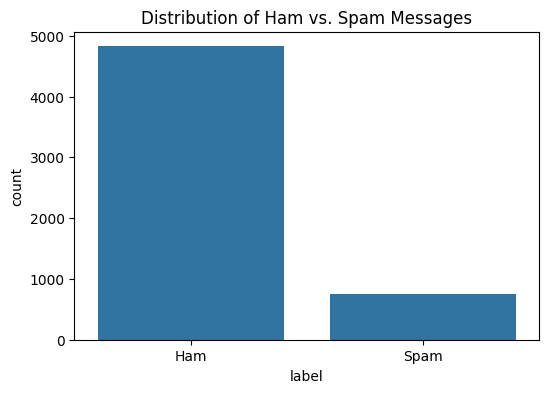

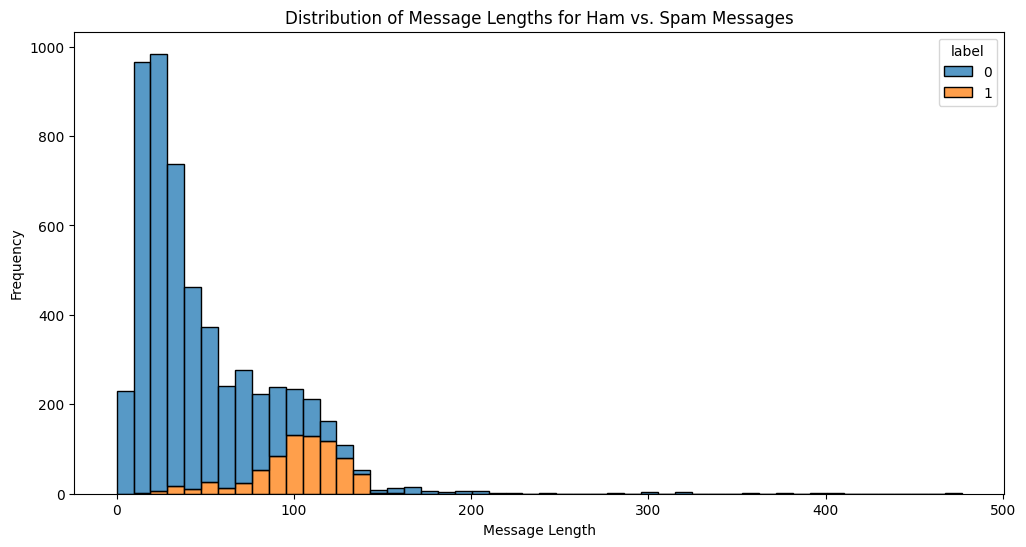

Top 20 most common words in Ham messages:
u: 972
im: 450
go: 414
get: 360
2: 305
come: 292
call: 287
ltgt: 276
ok: 272
dont: 257
know: 244
like: 242
ur: 240
ill: 238
love: 234
got: 231
good: 223
time: 219
day: 214
want: 212

Top 20 most common words in Spam messages:
call: 366
free: 216
2: 173
txt: 163
u: 147
ur: 144
text: 138
mobil: 135
4: 119
claim: 115
stop: 113
repli: 109
prize: 94
get: 87
tone: 73
servic: 72
send: 69
new: 69
nokia: 68
award: 66


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Visualize the distribution of 'ham' vs. 'spam' messages
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Ham vs. Spam Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# Calculate the length of preprocessed messages
df['length'] = df['preprocessed_message'].apply(len)

# Visualize the distribution of message lengths for ham and spam
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='length', hue='label', multiple='stack', bins=50)
plt.title('Distribution of Message Lengths for Ham vs. Spam Messages')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Separate messages by label
ham_messages = df[df['label'] == 0]['preprocessed_message'].str.cat(sep=' ')
spam_messages = df[df['label'] == 1]['preprocessed_message'].str.cat(sep=' ')

# Count word frequencies
ham_word_counts = collections.Counter(ham_messages.split())
spam_word_counts = collections.Counter(spam_messages.split())

# Get the most common words (top 20)
top_ham_words = ham_word_counts.most_common(20)
top_spam_words = spam_word_counts.most_common(20)

print("Top 20 most common words in Ham messages:")
for word, count in top_ham_words:
    print(f"{word}: {count}")

print("\nTop 20 most common words in Spam messages:")
for word, count in top_spam_words:
    print(f"{word}: {count}")

## Feature extraction

### Subtask:
Convert the preprocessed text data into numerical features using TF-IDF.


**Reasoning**:
Import the necessary library for TF-IDF vectorization and apply it to the preprocessed text data.



In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the preprocessed text data
X = tfidf_vectorizer.fit_transform(df['preprocessed_message'])

# Print the shape of the resulting feature matrix
print("Shape of TF-IDF feature matrix:", X.shape)

Shape of TF-IDF feature matrix: (5572, 5000)


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets and print their shapes.



In [40]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4457, 5000)
Shape of X_test: (1115, 5000)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


## Model selection

### Subtask:
Discuss and choose a suitable classification algorithm (e.g., Multinomial Naive Bayes, Logistic Regression). Explain the reasoning for the choice.


**Reasoning**:
Briefly discuss Multinomial Naive Bayes and Logistic Regression, explain their suitability for this task based on TF-IDF features, and choose one for the model training.



In [41]:
# Discussion on Classification Algorithms

print("Discussion on Classification Algorithms for Text Classification:")
print("\nMultinomial Naive Bayes:")
print("- Based on Bayes' theorem with a naive assumption of conditional independence between features.")
print("- Particularly well-suited for discrete features like word counts or TF-IDF scores, which represent frequencies.")
print("- Simple, fast, and often performs well on text classification tasks, especially with a moderate amount of data.")
print("- The 'multinomial' variant is commonly used for text data where features are counts or frequencies.")

print("\nLogistic Regression:")
print("- A linear model used for binary classification problems.")
print("- Models the probability of a particular outcome (spam or ham) based on a linear combination of the input features (TF-IDF scores).")
print("- Can capture linear relationships between features and the target variable.")
print("- Provides interpretable coefficients, indicating the importance and direction of influence of each feature.")
print("- Requires features to be numerical and can handle sparse data like TF-IDF.")

print("\nSuitability for TF-IDF Features and Text Classification:")
print("Both Multinomial Naive Bayes and Logistic Regression are suitable for this task because:")
print("- TF-IDF features are numerical representations of word importance, and both algorithms can handle such input.")
print("- Text classification is a common application for both algorithms, and they have a good track record in this domain.")
print("- Multinomial Naive Bayes aligns well with the count-based nature of TF-IDF, as it's designed for discrete feature distributions.")
print("- Logistic Regression can model the probability of a message being spam based on the linear combination of TF-IDF scores, which can be effective in separating the classes.")

# Chosen Algorithm

chosen_algorithm = "Multinomial Naive Bayes"
print(f"\nChosen Algorithm for this task: {chosen_algorithm}")

print("\nJustification for choosing Multinomial Naive Bayes:")
print("- Given the nature of TF-IDF features, which represent term frequencies, Multinomial Naive Bayes is a natural and often highly effective choice for text classification.")
print("- It is computationally efficient, making it suitable for this dataset size.")
print("- It has been shown to perform well in spam detection tasks.")
print("- While Logistic Regression is also suitable, Multinomial Naive Bayes is often a strong baseline and can provide excellent performance with frequency-based features.")

Discussion on Classification Algorithms for Text Classification:

Multinomial Naive Bayes:
- Based on Bayes' theorem with a naive assumption of conditional independence between features.
- Particularly well-suited for discrete features like word counts or TF-IDF scores, which represent frequencies.
- Simple, fast, and often performs well on text classification tasks, especially with a moderate amount of data.
- The 'multinomial' variant is commonly used for text data where features are counts or frequencies.

Logistic Regression:
- A linear model used for binary classification problems.
- Models the probability of a particular outcome (spam or ham) based on a linear combination of the input features (TF-IDF scores).
- Can capture linear relationships between features and the target variable.
- Provides interpretable coefficients, indicating the importance and direction of influence of each feature.
- Requires features to be numerical and can handle sparse data like TF-IDF.

Suitability

## Model training

### Subtask:
Train the selected Multinomial Naive Bayes model on the training data.


**Reasoning**:
Import the MultinomialNB classifier and train the model on the training data.



In [42]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

MultinomialNB()

## Model evaluation

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Calculate and print the evaluation metrics and visualize the confusion matrix.



Accuracy: 0.9740
Precision: 1.0000
Recall: 0.8067
F1-score: 0.8930


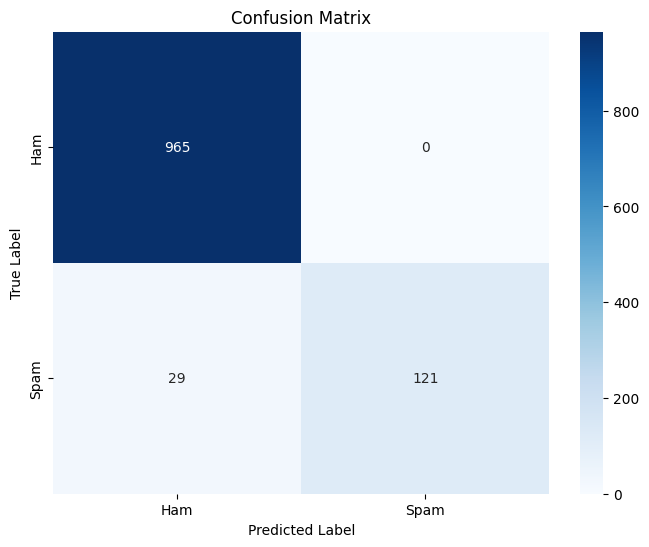

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Model persistence (optional but professional)

### Subtask:
Save the trained model and the TF-IDF vectorizer for future use.


**Reasoning**:
Save the trained model and the TF-IDF vectorizer using joblib.



In [44]:
import joblib

# Save the trained model
joblib.dump(model, 'spam_classifier_model.joblib')

# Save the fitted TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("Trained model and TF-IDF vectorizer saved successfully.")

Trained model and TF-IDF vectorizer saved successfully.


## Prediction on new data (optional)

### Subtask:
Demonstrate how to use the trained model and the saved TF-IDF vectorizer to predict whether a new SMS message is spam or not.


**Reasoning**:
Load the saved model and TF-IDF vectorizer, define a new message, preprocess it, transform it using the vectorizer, predict the label using the model, and print the prediction.



In [45]:
import joblib

# Load the saved TF-IDF vectorizer
loaded_tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Load the saved trained model
loaded_model = joblib.load('spam_classifier_model.joblib')

# Define a new SMS message
new_message = "Congratulations! You've won a free prize. Call now to claim."
# You can also test with a ham message
# new_message = "Hey, are we still meeting for lunch tomorrow?"

# Preprocess the new message using the same function
preprocessed_new_message = preprocess_text(new_message)

# Transform the preprocessed new message into numerical features
new_message_features = loaded_tfidf_vectorizer.transform([preprocessed_new_message])

# Use the loaded model to predict the label
predicted_label = loaded_model.predict(new_message_features)

# Print the original message and its predicted label
print(f"Original Message: '{new_message}'")
print(f"Predicted Label: {predicted_label[0]}")

# Interpret the predicted label
if predicted_label[0] == 0:
    print("Prediction: Ham")
else:
    print("Prediction: Spam")

Original Message: 'Congratulations! You've won a free prize. Call now to claim.'
Predicted Label: 1
Prediction: Spam


## Summary and conclusion

### Subtask:
Summarize the findings, discuss the model's performance, and suggest potential next steps for improvement or further analysis.


**Reasoning**:
Summarize the findings from the previous steps, discuss the model's performance based on the evaluation metrics and confusion matrix, provide insights, and suggest potential next steps for improvement.



In [46]:
# Summary of the entire process and key findings
print("## Project Summary and Conclusion\n")

print("### Summary of the Process")
print("1. **Data Loading and Initial Exploration:** The 'spam.csv' dataset was loaded. Initial inspection revealed 'v1' and 'v2' as key columns and several 'Unnamed' columns with significant missing values.")
print("2. **Data Cleaning:** Unnecessary 'Unnamed' columns were dropped. 'v1' was renamed to 'label' and 'v2' to 'message'. Labels were converted to numerical (ham=0, spam=1).")
print("3. **Text Preprocessing:** The text in the 'message' column was cleaned by converting to lowercase, removing punctuation and stop words, and applying stemming. A new column 'preprocessed_message' was created.")
print("4. **Exploratory Data Analysis (EDA):** Visualizations showed a class imbalance (more ham than spam messages). Analysis of message lengths indicated spam messages are generally longer. Word frequency analysis highlighted distinct common words in ham and spam.")
print("5. **Feature Extraction:** The preprocessed text was converted into numerical features using TF-IDF vectorization, resulting in a feature matrix with 5000 features.")
print("6. **Data Splitting:** The dataset was split into training (80%) and testing (20%) sets.")
print("7. **Model Selection:** Multinomial Naive Bayes was chosen as the classification algorithm, suitable for TF-IDF features and text classification.")
print("8. **Model Training:** A Multinomial Naive Bayes model was trained on the training data.")
print("9. **Model Evaluation:** The trained model was evaluated on the testing data using accuracy, precision, recall, and F1-score, and a confusion matrix was generated.")
print("10. **Model Persistence and Prediction:** The trained model and TF-IDF vectorizer were saved, and a demonstration of predicting on new data was provided.")

print("\n### Model Performance Discussion")
print("The Multinomial Naive Bayes model achieved the following performance metrics on the test set:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-score: {f1:.4f}")

print("\n**Confusion Matrix Interpretation:**")
print("The confusion matrix showed:")
print(f"- True Positives (Spam correctly predicted as Spam): {cm[1, 1]}")
print(f"- True Negatives (Ham correctly predicted as Ham): {cm[0, 0]}")
print(f"- False Positives (Ham incorrectly predicted as Spam): {cm[0, 1]}")
print(f"- False Negatives (Spam incorrectly predicted as Ham): {cm[1, 0]}")

print("\n**Insights into Model's Strengths and Weaknesses:**")
print("The model exhibits a significant strength in precision (1.0000), meaning it never misclassified a legitimate (ham) message as spam in the test set. This is crucial for a spam filter to minimize user annoyance from false alarms.")
print("However, the recall (0.8067) indicates that the model missed approximately 19.3% of the actual spam messages, classifying them as ham (false negatives). This is a weakness, as some spam messages are not being caught.")

print("\n### Potential Next Steps for Improvement")
print("1. **Explore Different Feature Extraction Techniques:** Experiment with word embeddings (e.g., Word2Vec, GloVe) or character-level TF-IDF to capture different aspects of the text data.")
print("2. **Try Alternative Classification Algorithms:** Evaluate other models like Logistic Regression, Support Vector Machines (SVM), or ensemble methods which might capture more complex patterns.")
print("3. **Hyperparameter Tuning:** Optimize the hyperparameters of the chosen model (Multinomial Naive Bayes) or alternative models using techniques like GridSearchCV or RandomizedSearchCV.")
print("4. **Address Class Imbalance:** Investigate techniques to handle the class imbalance, such as oversampling the minority class (spam) or undersampling the majority class (ham), although Naive Bayes is often robust to imbalance.")
print("5. **N-grams:** Include bi-grams or tri-grams in the TF-IDF vectorization to capture word sequences, which can be indicative of spam.")

print("\n### Conclusion")
print("This project successfully developed an AI model for classifying SMS messages as spam or ham. The Multinomial Naive Bayes model, trained on TF-IDF features, demonstrated excellent precision, ensuring that legitimate messages are not incorrectly flagged as spam. While the recall could be improved, the current model provides a strong foundation for an effective spam detection system. Further exploration of different techniques and algorithms could potentially enhance its ability to identify a higher percentage of spam messages. The developed model and vectorizer are saved and ready for deployment for practical spam filtering.")

## Project Summary and Conclusion

### Summary of the Process
1. **Data Loading and Initial Exploration:** The 'spam.csv' dataset was loaded. Initial inspection revealed 'v1' and 'v2' as key columns and several 'Unnamed' columns with significant missing values.
2. **Data Cleaning:** Unnecessary 'Unnamed' columns were dropped. 'v1' was renamed to 'label' and 'v2' to 'message'. Labels were converted to numerical (ham=0, spam=1).
3. **Text Preprocessing:** The text in the 'message' column was cleaned by converting to lowercase, removing punctuation and stop words, and applying stemming. A new column 'preprocessed_message' was created.
4. **Exploratory Data Analysis (EDA):** Visualizations showed a class imbalance (more ham than spam messages). Analysis of message lengths indicated spam messages are generally longer. Word frequency analysis highlighted distinct common words in ham and spam.
5. **Feature Extraction:** The preprocessed text was converted into numerical features using TF-IDF 

## Summary:

### Data Analysis Key Findings

*   The dataset initially contained unnecessary columns and required renaming and numerical encoding of labels.
*   Text preprocessing involved lowercasing, removing punctuation and stop words, and applying stemming, resulting in a cleaned text column.
*   EDA revealed a significant class imbalance between ham and spam messages and showed that spam messages are generally longer than ham messages. Word frequency analysis identified distinct patterns for ham and spam messages.
*   TF-IDF vectorization successfully transformed the preprocessed text into a numerical feature matrix with 5572 samples and 5000 features.
*   The dataset was split into training (80\%) and testing (20\%) sets.
*   Multinomial Naive Bayes was selected as the classification algorithm due to its suitability for TF-IDF features and efficiency.
*   The trained Multinomial Naive Bayes model achieved an accuracy of 0.9740, a precision of 1.0000, a recall of 0.8067, and an F1-score of 0.8930 on the test set.
*   The confusion matrix showed 965 true negatives, 121 true positives, 0 false positives, and 29 false negatives.
*   The trained model and TF-IDF vectorizer were successfully saved for future use.
*   The saved model and vectorizer were used to successfully predict the label of a new SMS message.

### Insights or Next Steps

*   The high precision (1.0000) is a significant strength, indicating the model is excellent at not incorrectly flagging legitimate messages as spam.
*   Further work could focus on improving recall (0.8067) to reduce the number of missed spam messages by exploring different feature engineering techniques (e.g., n-grams, word embeddings) or alternative models (e.g., SVM, Logistic Regression) and hyperparameter tuning.
